#  PROJETO DATA SCIENCE - TITANIC

O RMS Titanic foi um navio de passageiros britânico foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg no dia 14 de abril e afundou na madrugada do dia seguinte com mais de 1.500 pessoas a bordo.

*fonte: [Wikipedia](https://pt.wikipedia.org/wiki/RMS_Titanic)*

#### ORIGEM DOS DADOS
A base de dados usada foi `'titanic-data-6.csv'` e tem sua origem no site [Kaggle](https://www.kaggle.com/c/titanic/data.) 

##  1- Analisando os dados do Titanic

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_titanic = pd.read_csv('titanic-data-6.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
# Avaliando o tamanho do dataframe em linhas e colunas.
print('O dataframe do Titanic possui {} linhas e {} colunas'.format(df_titanic.shape[0], df_titanic.shape[1]))

O dataframe do Titanic possui 891 linhas e 12 colunas


In [60]:
# Conhecendo os tipos de dados de cada coluna
df_titanic.info()

# Confirmando os valores faltantes de cada coluna. 
print('\n- Colunas com valores Faltantes: {0} \n'.format(df_titanic.columns[df_titanic.isnull().any()].values))

# Checar se há duplicação de dados:
print('- Existem {} dados duplicados'.format(sum(df_titanic.duplicated())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

- Colunas com valores Faltantes: ['Age' 'Cabin' 'Embarked'] 

- Existem 0 dados duplicados


In [61]:
# Avaliando a quantidade de dados únicos
df_titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## 2- Perguntas
Com base nos dados do arquivo 'titanic-data-6.csv' iremos explorar as seguintes relações:

1- Qual o percentual de pessoas que sobreviveram ao acidente? <br/><br/>
2- Qual a quantidade de passageiros por classes? <br/><br/>
3- Pessoas das classes 1º e 2º sobreviveram em maior quantidade do que pessoas da 3º classes?<br/><br/>
4- Há relação de sobrevivência com o gênero e cultura do ditado popular “Mulheres e crianças primeiro”?<br/><br/>
5- Qual porto teve mais sobreviventes?<br/><br/>
6- Qual a relação dos ticket class por porto?<br/><br/>

## 3- Preparando a base
Corrigindo e limpando o dataframe


In [62]:
# modificando os rótulos das colunas
df_titanic.columns = [col.lower() for col in df_titanic.columns]
df_titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
# Descartando colunas irrelevantes para a análise
df_titanic.drop(['passengerid','sibsp','name','age','parch','ticket','cabin'],axis=1, inplace=True)
df_titanic.head()

,survived,pclass,sex,fare,embarked
0,0,3,male,7.2500,S
1,1,1,female,71.2833,C
2,1,3,female,7.9250,S
3,1,1,female,53.1000,S
4,0,3,male,8.0500,S


## 4- Explorando
Cruzando os dados para obter as respostas as perguntas:

***1- Qual o percentual de pessoas que sobreviveram ao acidente?***

Do total de 891 passageiros, temos: 
 » 342 sobreviventes 
 » 549 mortos


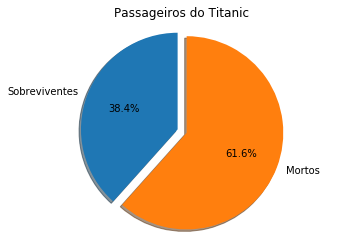

In [64]:
# extraindo o número total de passageiros. 
total_passenger =  df_titanic['survived'].count()

# extraindo o número total de passageiros que sobreviveram.
survivers = df_titanic.query('survived == 1').count()
survivers = survivers['survived']

#extraindo o número total de passageiros que morreram.
deads = df_titanic.query('survived < 1').count()
deads = deads['survived']

# apresentando de forma consolidada o número total de passageiros, sobreviventes e mortos 
print('Do total de {} passageiros, temos: \n » {} sobreviventes \n » {} mortos'.format(total_passenger, survivers, deads))

# Gráfico da relação entre mortos e sobreviventes. 
label = ['Sobreviventes', 'Mortos']
qtd_survi_dead = [survivers, deads]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(qtd_survi_dead, explode = explode, labels = label, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
ax1.set_title('Passageiros do Titanic')
plt.show()

Baseado nos dados visíveis acima:
   - Apenas `38,4%` dos passageiros sobreviveram ao acidente (342 pessoas).

***2- Qual a quantidade de passageiros por classes?*** 

Tinhamos a bordo do Titanic a seguinte organização de passageiros: 
 » 216 em 1ª Classe 
 » 184 em 2ª Classe 
 » 491 em 3ª Classe


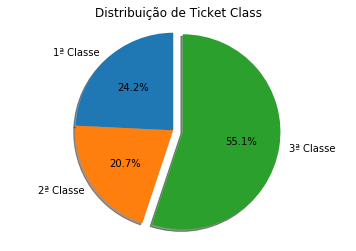

In [65]:
# Colocamos os ticket class (pclass) como index, agrupar e contar a quantidade de passageiros. 
total_pass_class = df_titanic.groupby('pclass')['survived'].count()

# separar as quantidades de passageiros por ticket class. 
total_1class = total_pass_class.iloc[0]
total_2class = total_pass_class.iloc[1]
total_3class = total_pass_class.iloc[2]

# imprimir as quantidades de passageiros por ticket class. 
print('Tinhamos a bordo do Titanic a seguinte organização de passageiros: \n » {} em 1ª Classe \n » {} em 2ª Classe \n » {} em 3ª Classe'
      .format(total_1class, total_2class, total_3class))

# Gráfico da relação entre as classes de passageiros. 
labels = ['1ª Classe', '2ª Classe', '3ª Classe']
sizes = [total_1class, total_2class, total_3class]
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
ax1.set_title('Distribuição de Ticket Class')
plt.show()

Baseado nos dados visíveis acima:
   - A 3º classe com 55,1% ou `491 pessoas` tinha o maior número de passageiros embarcados. 
   - A 1º classe com 24,2% ou `216 pessoas` era a segunda maior em número de passageiros embarcados e
   - A 2º classe com 20,7% ou `184 pessoas` era a menor em número de passageiros dentre todas.

***3- Pessoas das classes 1º e 2º sobreviveram em maior quantidade do que pessoas da 3º classes?***

A quantidade de sobreviventes por ticket classes é:
» 1º classe: 136 sobreviventes e 80 mortos
» 2º classe: 87 sobreviventes e 97 mortos
» 3º classe: 119 sobreviventes e 372 mortos


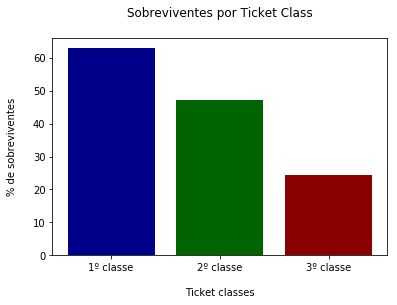

In [66]:
# Colocamos os ticket class (pclass) como index, para conhecer a quantidade de sobreviventes e mortos por tiket class.
count_class = df_titanic.groupby('pclass')['survived'].value_counts()

# desmonstrar a quantidade de sobreviventes e mortos por ticket class. 
print('A quantidade de sobreviventes por ticket classes é:') 
print('» 1º classe: {} sobreviventes e {} mortos'.format(count_class.iloc[0], count_class.iloc[1]))
print('» 2º classe: {} sobreviventes e {} mortos'.format(count_class.iloc[3], count_class.iloc[2]))
print('» 3º classe: {} sobreviventes e {} mortos'.format(count_class.iloc[5], count_class.iloc[4]))

# Calculamos a relação (sobreviventes / sobreviventes + mortos) por cada tipo de ticket class. 
mean_pclass = df_titanic.groupby('pclass')['survived'].mean()

# Gráfico da relação entre sobreviventes e mortos por cada tipo de ticket class.
classes = ['1º classe', '2º classe', '3º classe'] 
perc_surviver = [mean_pclass[1]*100, mean_pclass[2]*100, mean_pclass[3]*100] 
color = "darkblue", "darkgreen", "darkred" 

plt.bar(classes, perc_surviver, color=color);
plt.title('Sobreviventes por Ticket Class\n')
plt.xlabel('\nTicket classes')
plt.ylabel('% de sobreviventes\n');

Baseado nos dados visíveis acima:
   - A 1º e 2º classe tiveram nítidamente mais sobreviventes que a 3º classe. 
       - 1º classe: 62% de sobreviventes
       - 2º classe: 48% de sobreviventes 
       - enquanto a 3º classe teve apenas 25% de sobreviventes.

***4- Há relação de sobrevivência com o gênero e cultura do ditado popular “Mulheres e crianças primeiro”?***

Havia a seguinte distribuição de passageiros a partir dos gêneros:
» Total-Masculino: 577 
» Total-Feminino: 314 
» Total: 891

Havia uma proporção de aproximadamente 02 pessoas do gênero Masculino para cada 01 pessoa do gênero Feminino.

Porém a relação entre as mortes de gêneros é de aproximadamente 06 pessoas do gênero Masculino mortas 
para cada 01 pessoa do gênero Feminino.


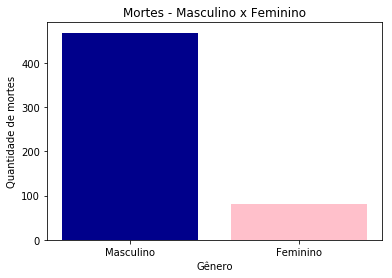

In [67]:
# Contagem da quantidade passageiros por gêneros (sex - Male e Female).
count_sex = df_titanic['sex'].value_counts()

# Soma total dos passageiros. 
total_passager = count_sex['male'] + count_sex['female']

# Colocamos os gênero (sex) como index, para contar a quantidade de sobreviventes e mortos.
count_gender = df_titanic.groupby('sex')['survived'].value_counts()

# Separando a quantidade de mortos por gênero.
male_dead =  count_gender[2]
female_dead = count_gender[1]

# Desmonstrar a quantidade de passageiros por gênero. 
print('Havia a seguinte distribuição de passageiros a partir dos gêneros:\n» Total-Masculino: {} \n» Total-Feminino: {} \n» Total: {}'
      .format(count_sex['male'],count_sex['female'], total_passager))

# Avaliar e calcular a proporção de gêneros masculino(male) e feminino(female). 
gender_proportion = round(count_sex['male']/count_sex['female'])
dead_proportion =  male_dead/female_dead

# Desmonstrar a relação entre de passageiros por gênero. 
print('\nHavia uma proporção de aproximadamente 0{0:.0f} pessoas do gênero Masculino para cada 01 pessoa do gênero Feminino.'
      .format(gender_proportion))

# Desmonstrar a relação de morte entre passageiros por gênero. 
print('\nPorém a relação entre as mortes de gêneros é de aproximadamente 0{0:.0f} pessoas do gênero Masculino mortas \npara cada 01 pessoa do gênero Feminino.'
     .format(dead_proportion))

# Gráfico da quantidade de mortos por gênero. 
gender = ['Masculino', 'Feminino'] 
gender_surviver = [male_dead, female_dead] 
color = 'darkblue', 'pink' 

plt.bar(gender, gender_surviver, color=color);
plt.title('Mortes - Masculino x Feminino')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de mortes');

Baseado nos dados visíveis acima:
   - A mortalidade do gênero masculino é `6x maior` que a mortalidade do gênero feminino nesse acidente.
       - Masculino: 577 mortos
       - Feminino: 314 mortos

***5- Qual porto teve mais sobreviventes?***

A quantidade de passageiros embarcados nos portos são:
» Cherbourg 168 pessoas 
» Queenstown 77 pessoas 
» Southampton 644 pessoas 
» Total 889 pessoas 


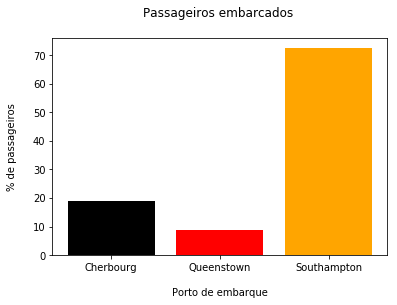

In [68]:
#Isolando a coluna Embarque (embarked) para realizar a separação e contagem dos portos. 
embarked = df_titanic['embarked']

# Somando o total de passageiros embarcados em todos os portos
total_embarked = df_titanic['embarked'].value_counts().sum()

# Variáveis do total de contagem de cada porto.
total_pass_s = 0
total_pass_c = 0
total_pass_q = 0


# Loop para separação e contagem de passageiros por porto.  
for i in embarked:
    if i == 'S':
        total_pass_s += 1 
    elif i == 'C':
        total_pass_c += 1
    elif i == 'Q':
        total_pass_q += 1

# Exibir a quantidade de passageiro por porto.  
print('A quantidade de passageiros embarcados nos portos são:\n» Cherbourg {} pessoas \n» Queenstown {} pessoas \n» Southampton {} pessoas \n» Total {} pessoas '
      .format(total_pass_c, total_pass_q, total_pass_s, total_embarked))

# Gráfico da relação quantidade de passageiro x porto de embarque. 
qtd_embarked = [total_pass_c/total_embarked*100, total_pass_q/total_embarked*100, total_pass_s/total_embarked*100]
ports = ['Cherbourg','Queenstown','Southampton']
plt.bar(ports, qtd_embarked, color = ('black','red','orange'));
plt.title('Passageiros embarcados \n')
plt.xlabel('\nPorto de embarque')
plt.ylabel('% de passageiros\n'); 

Baseado nos dados visíveis acima:
   - Mais de 70% dos passageiros embarcados foram do porto da cidade Southampton/UK.
   
Nos gráficos abaixos iremos aprofundar a análise de sobreviventes e mortes por porto. 

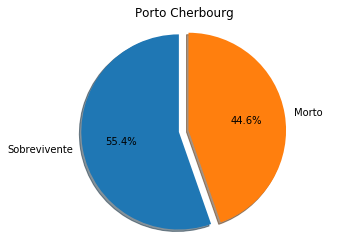

In [69]:
# Colocamos os Embarcados (embarked) como index, para conhecer a quantidade de sobreviventes e mortos por porto.
total_surv_dead_port =  df_titanic.groupby('embarked')['survived'].value_counts()

# Listas de sobreviventes e mortos por porto. 
port_c_survi_dead = [total_surv_dead_port[0],total_surv_dead_port[1]]
port_q_survi_dead = [total_surv_dead_port[3],total_surv_dead_port[2]]
port_s_survi_dead = [total_surv_dead_port[5],total_surv_dead_port[4]]

# Gráfico de sobreviventes e mortes os passageiros embarcados em Cherbourg.
tipo = ['Sobrevivente', 'Morto']
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(port_c_survi_dead, explode = explode, labels = tipo, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
ax1.set_title('Porto Cherbourg')
plt.show()   

Baseado nos dados visíveis acima:
   - 55,4% dos passageiros do porto da cidade Cherbourg sobreviveram.

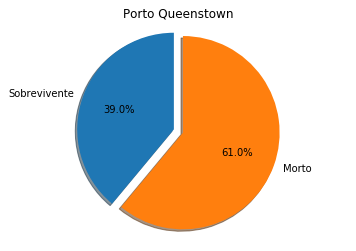

In [70]:
# Gráfico de sobreviventes e mortes os passageiros embarcados em Queenstown.
tipo = ['Sobrevivente', 'Morto']
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(port_q_survi_dead, explode = explode, labels = tipo, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
ax1.set_title('Porto Queenstown')
plt.show()   

Baseado nos dados visíveis acima:
   - Apenas 39% dos passageiros do porto da cidade Queentown sobreviveram.

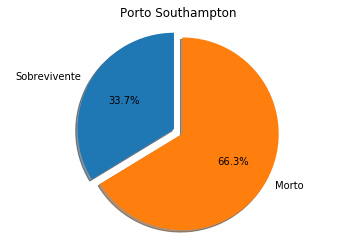

In [71]:
# Gráfico de sobreviventes e mortes os passageiros embarcados em Southampton.
tipo = ['Sobrevivente', 'Morto']
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(port_s_survi_dead, explode = explode, labels = tipo, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
ax1.set_title('Porto Southampton')
plt.show()  

Baseado nos dados visíveis acima:
   - Apenas 33,7% dos passageiros do porto da cidade Southampton sobreviveram.

Analisando os 4 gráficos acima referente a pergunta 5, podemos concluir que:
   - O porto com maior número de sobreviventes foi o de `Cherbourg com 55,4%` de sobreviventes, embora curiosamente não tenha sido o porto com maior número de pessoas embarcadas no navio.

***6- Qual a relação dos ticket class por porto?***

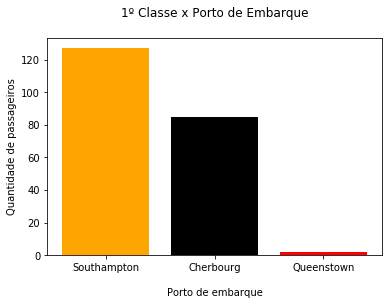

In [72]:
# Agrupamos Ticket Class (pclass) como index e iremos contar a quantidade de passageiros de cada porto por Ticket class. 
count_class_port = df_titanic.groupby('pclass')['embarked'].value_counts()

#Gráfico de passageiros da 1º Classe x porto de embarque.
first_class_port = count_class_port[1]

ports = ['Southampton', 'Cherbourg', 'Queenstown']
plt.bar(ports, first_class_port.tolist(), color = ('orange', 'black', 'red'));
plt.title('1º Classe x Porto de Embarque\n')
plt.xlabel('\nPorto de embarque')
plt.ylabel('Quantidade de passageiros'); 

Baseado nos dados visíveis acima:
   - Grande parte dos passageiros da 1º classe vieram dos portos de Southampton e Cherbourg.

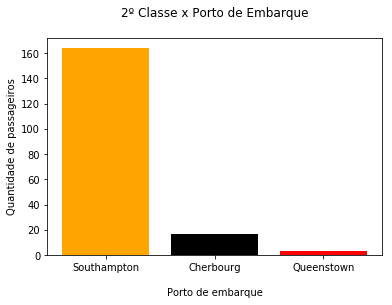

In [73]:
#Gráfico de passageiros da 2º Classe x porto de embarque.
second_class_port = count_class_port[2]

ports = ['Southampton','Cherbourg','Queenstown']
plt.bar(ports, second_class_port.tolist(), color = ('orange', 'black', 'red'));
plt.title('2º Classe x Porto de Embarque\n')
plt.xlabel('\nPorto de embarque')
plt.ylabel('Quantidade de passageiros'); 

Baseado nos dados visíveis acima:
   - Quase que em sua totalidade a 2º classe é formada por embarcados no porto de Southampthon

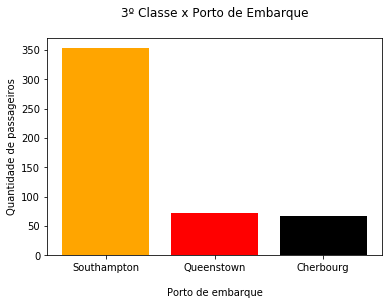

In [74]:
#Gráfico de passageiros da 3º Classe x porto de embarque.
third_class_port = count_class_port[3]

ports = ['Southampton','Queenstown','Cherbourg']
plt.bar(ports, third_class_port.tolist(), color = ('orange', 'red', 'black'));
plt.title('3º Classe x Porto de Embarque\n')
plt.xlabel('\nPorto de embarque')
plt.ylabel('Quantidade de passageiros'); 

Baseado nos dados visíveis acima:
   - Grande parte dos passageiros da 3º classe vieram dos portos de Southampton.
   - Queenstown e Cherbourg possuem uma mesma quantidade de embarcados na 3º classe.

## 5- Conclusão 

Aqui serão apresentados alguns insights dos dados analisados acima sobre o naufrágio do Titanic.

- 38% dessa base sobreviveram ao desastre do Titanic representando 342 pessoas.<br>

- Maior parte dos passageiros são da 3º classe com 491, seguidos da 1º classe com 216 e 184 da 2º classe.<br> 

- O resultado da relação entre sobreviventes x mortos de um mesmo Ticket Class (pclass) demonstra que:<br>
        
        -> Mais de 62% dos passageiros da 1º classe sobreviveram
        -> Apenas 25% dos passageiros da 3º classe sobreviveram

- O número de mortes do gênero masculino é **6x maior** no gênero feminino.<br> 

Isso reforçaria a tese que mulheres e crianças tem grande prioridade no resgate ou no processo evacuação em navios. Porém em reportagem realizada pelo portal UOL, um estudo realizado pelo Departamento de Economia da Universidade de Uppsala, Suécia, e publicado nas Atas da Academia Nacional de Ciências (PNAS) diz que as mulheres sobreviveram mais que os homens em apenas dois dos 18 naufrágios estudados, o do Titanic em 1912 e do Birkenhead. Sendo assim, a prioridade de salvamento para mulheres e crianças é apenas um mito presente no Titanic e Birkenhead.

*Fonte: [UOL - Homens sobrevivem mais aos naufrágios](https://noticias.uol.com.br/saude/ultimas-noticias/afp/2012/07/31/homens-sobrevivem-mais-que-mulheres-e-criancas-em-naufragios-titanic-e-excecao.htm?)*

- Os passageiros embarcaram em:<br>
   > Southampton, Reino Unido = 644 pessoas (local de partida)
       -> a maior quantidade absoluta de passageiros da 3º viera desse porto.
   
   > Cherbourg, França =  168 pessoas <br>
       -> a maior quantidade de passageiros desse porto era da 2º classe.
   
   > Queenstown, Irlanda = 77 pessoas.<br>
       -> baixíssimo número de passageiros da 1º e 2º classe viera desse porto


- Avaliando os percentuais de sobreviventes e mortes, sabendo-se que as pessoas de 1º Classe e gênero feminino são as que sobreviveram ao desastre, podemos ter como hipótese que:<br>

    • Cherbourg possui uma parte considerável dos passageiros sobreviventes que são do gênero feminino e da 1º classe.

    • Southampton e Queenstown possuem a maioria dos mortos com gênero masculinos e da 3 º classe.

Essas duas hipóteses podem ser confirmadas futuramente com mais exploração da base e cruzamentos dos dados obtidos.<br>


#### Limitações:

Durante o estágio de análise dos dados verifiquei a falta de alguns valores nas seguintes colunas: Age, Cabin e Embarked.

Medidas tomadas:
- Age: essa coluna foi desprezada da análise.
- Cabin: essa coluna foi desprezada da análise
- Embarked: Essa coluna possuía apenas 2 valores faltantes não comprometendo a análise dos dados dessa coluna.  
